<a href="https://colab.research.google.com/github/gauravsax1911/tensk/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full) , (X_test , y_test)= fashion_mnist.load_data()
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [8]:
class_names = ["T-shirt/top" , "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

DATA RESHAPING

In [9]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))


**NORMALIZATION** 

In [10]:
X_train_n = X_train_full/255;
X_test_n = X_test/255;


In [11]:
X_valid , X_train = X_train_n[:5000] , X_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test_n

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides =1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

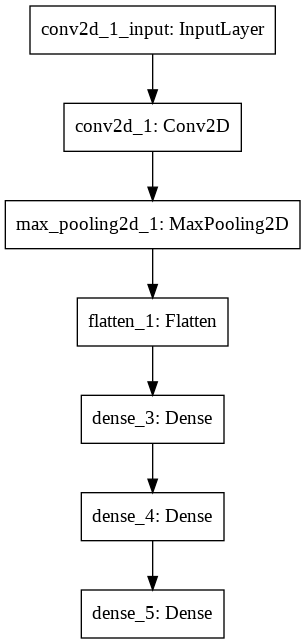

In [15]:
import pydot
keras.utils.plot_model(model)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [17]:
model_history= model.fit(X_train,y_train,epochs=8,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/8
860/860 [==============================] - 34s 39ms/step - loss: 1.2216 - accuracy: 0.6017 - val_loss: 0.7886 - val_accuracy: 0.7124
Epoch 2/8
860/860 [==============================] - 33s 39ms/step - loss: 0.5628 - accuracy: 0.7984 - val_loss: 0.4953 - val_accuracy: 0.8104
Epoch 3/8
860/860 [==============================] - 33s 39ms/step - loss: 0.4915 - accuracy: 0.8210 - val_loss: 0.9744 - val_accuracy: 0.6962
Epoch 4/8
860/860 [==============================] - 33s 38ms/step - loss: 0.4526 - accuracy: 0.8393 - val_loss: 0.4174 - val_accuracy: 0.8544
Epoch 5/8
860/860 [==============================] - 33s 39ms/step - loss: 0.4328 - accuracy: 0.8437 - val_loss: 0.4276 - val_accuracy: 0.8506
Epoch 6/8
860/860 [==============================] - 33s 39ms/step - loss: 0.3977 - accuracy: 0.8546 - val_loss: 0.3788 - val_accuracy: 0.8676
Epoch 7/8
860/860 [==============================] - 33s 39ms/step - loss: 0.3810 - accuracy: 0.8636 - val_loss: 0.4150 - val_accuracy: 0.8502

In [19]:
ev = model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.5553 - accuracy: 0.8003


In [20]:
ev

[0.5552693605422974, 0.8003000020980835]

In [22]:
X_new = X_test[:3]
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)